# Project Description
As an analyst Megaline a telecom operator where the company offers its clients two prepaid plans, Surf and Ultimate. 
The commercial department wants to know which of the plans brings in more revenue in order
to adjust the advertising budget.

# Business Goal
As part of the project, I am required to review the sample list of users to determine:
1. The number of calls and minutes used per month per user.
2. The number of text messages sent per month per user.
3. The volumn of data used per month per user.
4. Monthly revenue per user per month
5. plot a histogram. Calculate the mean, variance and standard deviation of tex, data and messages per month per user and Describe customer behaviour. 
6. Formulate and test the hypothesis using:
    * average revenue from users of both plans,
    * average revenue from users in NY-NJ regions.
 

## Open file and general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns

In [2]:
try:
    meg_user = pd.read_csv('.../megaline_users1.csv')
except:
    meg_user = pd.read_csv('/datasets/megaline_users1.csv')
meg_user

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [3]:
meg_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
try:
    meg_int = pd.read_csv('/.../megaline_internet.csv')
except:
    meg_int = pd.read_csv('/datasets/megaline_internet.csv')
meg_int.head()   

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [5]:
meg_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [6]:
try:
    meg_message = pd.read_csv('/.../megaline_messages.csv')
except:
    meg_message = pd.read_csv('/datasets/megaline_messages.csv')
meg_message.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [7]:
meg_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
try:
    meg_calls = pd.read_csv('/.../megaline_calls.csv')
except:
    meg_calls = pd.read_csv('/datasets/megaline_calls.csv')
meg_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [9]:
meg_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
try:
    meg_plan = pd.read_csv('/.../megaline_plans.csv')
except:
    meg_plan = pd.read_csv('/datasets/megaline_plans.csv')
meg_plan.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [11]:
meg_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


### Conclusion
There are five datasets in all. One covering user details and phone plan. The second covers user_ids and internet/data used. This is followed by user_id and message dates. Late but not least, there is the user_id and call duration and then the details of the two type of plans being offered to customers. The date covers 500 user details.

## Data processing

In [12]:
meg_user.isnull().sum()/meg_user.shape[0]

user_id       0.000
first_name    0.000
last_name     0.000
age           0.000
city          0.000
reg_date      0.000
tariff        0.000
churn_date    0.932
dtype: float64

In [13]:
meg_int.isnull().sum()/meg_int.shape[0]

id              0.0
user_id         0.0
session_date    0.0
mb_used         0.0
dtype: float64

In [14]:
meg_message.isnull().sum()/meg_message.shape[0]

id              0.0
user_id         0.0
message_date    0.0
dtype: float64

In [15]:
meg_calls.isnull().sum()/meg_calls.shape[0]

id           0.0
user_id      0.0
call_date    0.0
duration     0.0
dtype: float64

For each of the dataframe, test check for null values. Except for the meg_user dataframe, there are no recorded null values in the dataframe. Churn-date which represents, date the customer stopped using the service indicates that, about 93.2% of the listed customers are still using our services as of the date of extrating data. 

In [16]:
meg_user['reg_date']=pd.to_datetime(meg_user['reg_date'])

In [17]:
meg_user = meg_user.rename(columns={'tariff': 'plan'})

In [18]:
meg_user['churn_date'] = pd.to_datetime(meg_user['churn_date'])

In [19]:
meg_user.loc[meg_user['churn_date'].isna(),'churn_date']=pd.to_datetime('today').date()

In [20]:
plan = {'ultimate': 1,'surf':0}

In [21]:
meg_user.plan = [plan[item] for item in meg_user.plan]

In [22]:
meg_user_int = meg_user.merge(meg_int).rename({'session_id':'id'},axis=1)

In [23]:
meg_user_int['session_date'] = pd.to_datetime(meg_user_int['session_date'])

In [24]:
meg_user_int['int_month'] = meg_user_int['session_date'].dt.month

In [25]:
meg_user_int['mb_used'] = meg_user_int['mb_used'].apply(np.ceil)

In [26]:
meg_user_meg = meg_user.merge(meg_message).rename({'message_id':'id'},axis=1)

In [27]:
meg_user_meg['message_date'] = pd.to_datetime(meg_user_meg['message_date'])

In [28]:
meg_user_meg['mess_month'] = meg_user_meg['message_date'].dt.month

In [29]:
meg_user_calls=meg_user.merge(meg_calls).rename({'call_id':'id'},axis=1)

In [30]:
meg_user_calls['call_date']=pd.to_datetime(meg_user_calls['call_date'])

In [31]:
meg_user_calls['call_month']=meg_user_calls['call_date'].dt.month

In [32]:
meg_user_calls['duration'] = meg_user_calls['duration'].apply(np.ceil)

In [33]:
meg_user_meg['id']=meg_user_meg['id'].str.replace('_','').astype('int')

In [34]:
meg_user_int['id']=meg_user_int['id'].str.replace('_','').astype('int')

In [35]:
meg_user_calls.duplicated().sum()

0

In [36]:
meg_user_meg.duplicated().sum()

0

In [37]:
meg_user_int.duplicated().sum()

0

### Conclusion 
As part of the data preparation process, the date columns have all been coverted to datetime format with the month extracted for some of the dataframe for use later. 
Considering the task at hand, the various dataframes have also been merged with the user details and mb_used for internet usage and duration for calls rounded up as part of company policy. 
The plan column has also been recoded to make it handy when using for analysis later. Also, there are no duplicates in the dataset.

## Exploratory Analysis

In [38]:
meg_user_int.describe()

,user_id,age,plan,id,mb_used,int_month
count,104825.000000,104825.000000,104825.000000,1.048250e+05,104825.000000,104825.000000
mean,1242.496361,45.623926,0.317090,8.700316e+05,367.142876,9.342552
std,142.053913,16.666432,0.465345,5.403356e+05,277.256974,2.400404
min,1000.000000,18.000000,0.000000,1.001000e+04,0.000000,1.000000
25%,1122.000000,31.000000,0.000000,1.373880e+05,137.000000,8.000000
50%,1236.000000,46.000000,0.000000,1.122233e+06,344.000000,10.000000
75%,1367.000000,61.000000,1.000000,1.293618e+06,555.000000,11.000000
max,1499.000000,75.000000,1.000000,1.499219e+06,1694.000000,12.000000


In [39]:
Q1=meg_user_int['mb_used'].quantile(0.25)
Q3=meg_user_int['mb_used'].quantile(0.75)
IQR = Q3-Q1

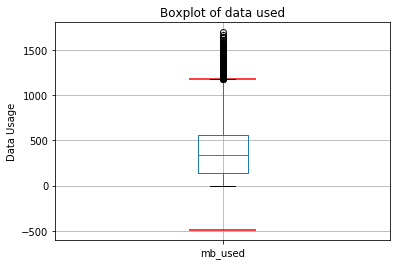

In [40]:
meg_user_int.boxplot('mb_used')
plt.hlines(y=[Q1-1.5*IQR],xmin= 0.9,xmax=1.1,color='red')
plt.hlines(y=[Q3+1.5*IQR],xmin= 0.9,xmax=1.1,color='red')
plt.ylabel('Data Usage')
plt.title('Boxplot of data used');

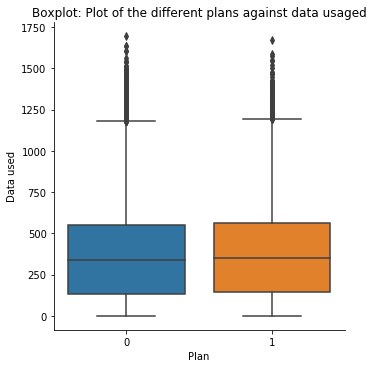

In [41]:
sns.catplot(x='plan',y='mb_used',kind='box',data= meg_user_int)
plt.ylabel('Data used')
plt.xlabel('Plan')
plt.title('Boxplot: Plot of the different plans against data usaged');

In [42]:
meg_user_int= meg_user_int.query('mb_used <=1200')

In [43]:
meg_user_meg.describe()

,user_id,age,plan,id,mess_month
count,76051.000000,76051.000000,76051.000000,7.605100e+04,76051.000000
mean,1245.972768,45.386675,0.355511,1.087230e+06,9.584016
std,139.843635,16.969650,0.478671,1.685300e+06,2.276392
min,1000.000000,18.000000,0.000000,1.001100e+04,1.000000
25%,1123.000000,31.000000,0.000000,1.347735e+05,8.000000
50%,1251.000000,45.000000,0.000000,1.120507e+06,10.000000
75%,1362.000000,61.000000,1.000000,1.328548e+06,12.000000
max,1497.000000,75.000000,1.000000,1.470106e+07,12.000000


In [44]:
meg_user_calls.describe()

,user_id,age,plan,duration,call_month
count,137735.000000,137735.000000,137735.000000,137735.000000,137735.000000
mean,1247.658046,45.459847,0.316920,7.146673,9.320797
std,139.416268,17.087669,0.465278,5.953919,2.412550
min,1000.000000,18.000000,0.000000,0.000000,1.000000
25%,1128.000000,30.000000,0.000000,2.000000,8.000000
50%,1247.000000,47.000000,0.000000,6.000000,10.000000
75%,1365.000000,61.000000,1.000000,11.000000,11.000000
max,1499.000000,75.000000,1.000000,38.000000,12.000000


### Conclusion
The age ranges cuts across different age groups from 18 - 75 years with maximum call time being 38 minutes per call recorded as against 0 being the minimum. Where the call either might not have gone through or for some other reason. 
The data covers from january to december for the year in question and has 1694 as the maximum internet usage.
The boxplot above on data usage shows signicant outliers on the upper whiskers with values arround 1200 for both plans. Results beyond 1200 have been removed from the dataset.

## Other Analysis

In [45]:
meg_user_meg_pivoted=pd.DataFrame(meg_user_meg
                                  .pivot_table(index=['user_id','mess_month'],
                                                           values='id',aggfunc='count')).reset_index(drop=False)

In [46]:
meg_user_meg_pivoted.columns=['user_id','mess_month','mess_count']
meg_user_meg_pivoted.head()

,user_id,mess_month,mess_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [47]:
meg_user_int_pivoted = pd.DataFrame(meg_user_int
                                    .pivot_table(index=['user_id','int_month'], 
                                                 values='mb_used',aggfunc='sum')).reset_index(drop=False)

In [48]:
meg_user_int_pivoted.columns=['user_id','int_month','total_mb']
meg_user_int_pivoted

,user_id,int_month,total_mb
0,1000,12,1903.0
1,1001,8,6929.0
2,1001,9,13333.0
3,1001,10,22356.0
4,1001,11,18524.0
...,...,...,...
2272,1498,12,23160.0
2273,1499,9,13004.0
2274,1499,10,19515.0
2275,1499,11,15601.0


In [49]:
meg_user_calls_pivoted = pd.DataFrame(meg_user_calls
                                      .pivot_table(index=['user_id','call_month'], 
                                                   values='duration',aggfunc=['count','sum'])).reset_index(drop=False)


In [50]:
meg_user_calls_pivoted.columns=['user_id','call_month','call_count','total_duration']
meg_user_calls_pivoted

,user_id,call_month,call_count,total_duration
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0
...,...,...,...,...
2253,1498,12,39,339.0
2254,1499,9,41,346.0
2255,1499,10,53,385.0
2256,1499,11,45,308.0


In [51]:
meg_user_agg= (meg_user
.join(meg_user_calls_pivoted.groupby('user_id')[['total_duration','call_count']].sum(),on='user_id')
.join(meg_user_int_pivoted.groupby('user_id')['total_mb'].sum(),on='user_id')
.join(meg_user_meg_pivoted.groupby('user_id')['mess_count'].sum(),on='user_id'))

In [52]:
meg_user_agg.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,total_duration,call_count,total_mb,mess_count
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,1,2021-07-27,124.0,16.0,1903.0,11.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,0,2021-07-27,1728.0,261.0,80540.0,207.0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,0,2021-07-27,829.0,113.0,40339.0,88.0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,0,2021-07-27,1104.0,149.0,24625.0,50.0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,0,2021-07-27,2772.0,370.0,156548.0,177.0


In [53]:
def cal_extra_minute(row):
    plan=row['plan']
    total_duration=row['total_duration']
    if plan==1 and total_duration >3000:
        return (total_duration-3000)*0.01
    elif plan==0 and total_duration >500:
        return (total_duration-500)*0.03
    else:
        return 0
meg_user_agg['extra_minute'] =meg_user_agg.apply(cal_extra_minute,axis=1)

In [54]:
def cal_extra_meg(row):
    plan=row['plan']
    mess_count=row['mess_count']
    if plan==1 and mess_count > 1000:
        return (mess_count-1000)*0.01
    elif plan==0 and mess_count >50:
        return (mess_count-50)*0.03
    else:
        return 0
meg_user_agg['extra_meg'] =meg_user_agg.apply(cal_extra_minute,axis=1)

In [55]:
def cal_extra_data(row):
    plan=row['plan']
    total_mb=row['total_mb']/1025
    if plan==1 and total_mb > 30:
        return (total_mb-30)*0.07
    elif plan==0 and total_mb > 15:
        return (total_mb-15)*0.1
    else:
        return 0
meg_user_agg['extra_data'] =meg_user_agg.apply(cal_extra_minute,axis=1)

In [56]:
meg_user_agg.tail()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,total_duration,call_count,total_mb,mess_count,extra_minute,extra_meg,extra_data
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,0,2021-07-27,1765.0,253.0,99010.0,NaN,37.95,37.95,37.95
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,0,2021-07-27,1455.0,195.0,64357.0,65.0,28.65,28.65,28.65
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,1,2021-07-27,300.0,54.0,9898.0,50.0,0.00,0.00,0.00
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,0,2021-07-27,3211.0,451.0,227798.0,NaN,81.33,81.33,81.33
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,0,2021-07-27,1535.0,204.0,68766.0,NaN,31.05,31.05,31.05


In [57]:
meg_user_agg.plan.value_counts()

0    339
1    161
Name: plan, dtype: int64

In [58]:
meg_user_agg['total_profit']= (meg_user_agg['extra_data']+meg_user_agg['extra_minute']+meg_user_agg['extra_meg'])+ (161*70 +339*50)

In [59]:
month =12

In [60]:
meg_user_agg['minute_per_month'] =meg_user_agg['total_duration']/month
meg_user_agg['text_per_month'] = meg_user_agg['mess_count']/month
meg_user_agg['data_per_month']= meg_user_agg['total_mb']/month
meg_user_agg['profit_per_month'] = meg_user_agg['total_profit']/month

In [61]:
meg_user_agg.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,total_duration,call_count,total_mb,mess_count,extra_minute,extra_meg,extra_data,total_profit,minute_per_month,text_per_month,data_per_month,profit_per_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,1,2021-07-27,124.0,16.0,1903.0,11.0,0.00,0.00,0.00,28220.00,10.333333,0.916667,158.583333,2351.666667
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,0,2021-07-27,1728.0,261.0,80540.0,207.0,36.84,36.84,36.84,28330.52,144.000000,17.250000,6711.666667,2360.876667
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,0,2021-07-27,829.0,113.0,40339.0,88.0,9.87,9.87,9.87,28249.61,69.083333,7.333333,3361.583333,2354.134167
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,0,2021-07-27,1104.0,149.0,24625.0,50.0,18.12,18.12,18.12,28274.36,92.000000,4.166667,2052.083333,2356.196667
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,0,2021-07-27,2772.0,370.0,156548.0,177.0,68.16,68.16,68.16,28424.48,231.000000,14.750000,13045.666667,2368.706667


### Conclusion
With the use of the pivot table, we are able to group the data to aggregate to true number of messages sent per user, actual minutes used per user and number of messages sent per user for their respective months. 
The pivot tables were finally merged to give a complete overview of user details to enable us determine:
    * whether a user exceeded their allocated minutes,data and text messages, and also
    * help us calculate the extra charge and expected profit per plan.
By the analysis, It's eveident that, some customers did indeed exceed their allocated package per plan ad there are more surf users in the dataset than ultimate users. 

In [62]:
meg_user_agg_sub = {'minute_per_month':'minute_per_month','text_per_month':'text_per_month','data_per_month':'data_per_month','profit_per_month':'profit_per_month'}

In [63]:
def plot_graph(meg_user_agg,meg_user_agg_sub=meg_user_agg_sub):
    """ Takes two parameters and returns a graph comparing both 
        plans (ultimate and surf) for all parameters set in meg_user_sub.
    """
    ultimate=meg_user_agg[meg_user_agg['plan']==1]
    surf=meg_user_agg[meg_user_agg['plan']==0]
    for col, title in meg_user_agg_sub.items():
        plt.hist(surf[col],alpha=0.5,label=f' surf {col}')
        plt.hist(ultimate[col],alpha=0.5,label=f' ultimate {col}')
        plt.xlabel(f'{col}')
        plt.ylabel('Count') 
        plt.title(f'Distribution of {col} per plan')
        plt.legend()
        plt.show()

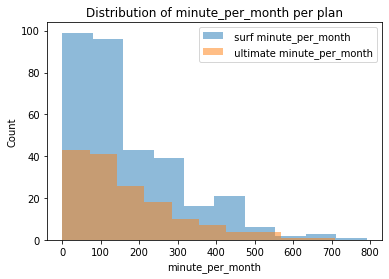

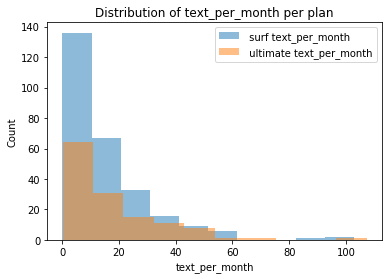

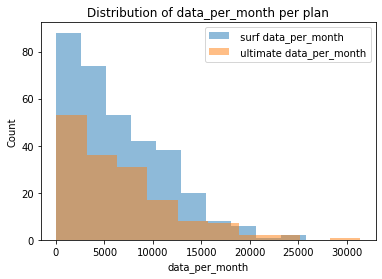

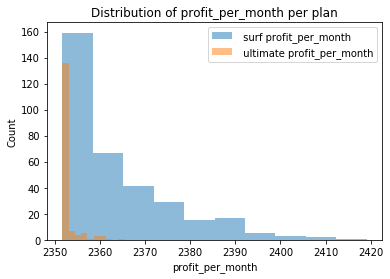

In [64]:
plot_graph(meg_user_agg)

In [65]:
stat= meg_user_agg[['minute_per_month','text_per_month','data_per_month','plan','profit_per_month']]

In [66]:
pd.DataFrame(stat.groupby('plan')[['minute_per_month','text_per_month','data_per_month','profit_per_month']].agg(['mean','var','std']).round(2))

minute_per_month                   text_per_month                 \
                 mean       var     std           mean     var    std   
plan                                                                    
0              172.40  20359.61  142.69          15.13  244.17  15.63   
1              166.63  19969.30  141.31          17.07  281.40  16.77   

     data_per_month                       profit_per_month                 
               mean          var      std             mean     var    std  
plan                                                                       
0           6470.04  24178662.83  4917.18          2363.24  157.13  12.54  
1           6494.70  29576630.61  5438.44          2352.51    5.15   2.27

### Conclusion
The histograms for call/minutes, text and data usage per month are right skewed with significant outliers for text for both plans. Surf plan has the highest peak in all three graphs.

Despite the proportion of the different plans in this dataset, it is evident that, ultimate is much more profitable and with less variability in profit than surf. 

The calculation of mean, variance and standard deviation for both plan show little difference  in customers call time spent. They have a mean of 172 and 166 for ultimate(1) and surf(0). This closed difference is evident in the variance and standard deviation on the spread of the data. Something which is not so clear when viewing the histogram. The significant variation is clear with the data usage as those on ultimate turn to use more data relative to their plan despite having almost the same mean value as surf users. 

## Hypothesis Testing

**Null hypothesis:** That the average profit from the two plans are the same.

**Altenative hypothesis:** That the average profit from the two plans are different.

In [67]:
ultimate = meg_user_agg[meg_user_agg['plan']==1]['profit_per_month']
surf = meg_user_agg[meg_user_agg['plan']==0]['profit_per_month']

In [68]:
alpha=0.5
results = st.ttest_ind(ultimate,surf,equal_var=True)
print('pvalue:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis: Average profit is different for the two plans.")
else:
    print("We can't reject the null hypothesis: Average profit is the same for the two plans.")

pvalue: 1.7874457293455437e-24
We reject the null hypothesis: Average profit is different for the two plans.


**Null hypothesis:** That the average profit from NY-NJ are the same relative to the entire population sample.

**Altenative hypothesis:** That the average profit from NY-NJ are different relative to the entire population sample.

In [69]:
meg_user_agg['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [70]:
NY = meg_user_agg[meg_user_agg['city'].str.contains('NY-NJ')]['profit_per_month'].dropna()
not_NY =  meg_user_agg[~meg_user_agg['city'].str.contains('NY-NJ')]['profit_per_month'].dropna()

In [71]:
alpha=0.5
results = st.ttest_ind(NY,not_NY,equal_var=True)
print('pvalue:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis: Average profit from users in NY_NJ are different")
else:
    print("We can't reject the null hypothesis: Average profit users in NY_NJ are the same")

pvalue: 0.05777756938476883
We reject the null hypothesis: Average profit from users in NY_NJ are different


### Conclusion
The Results indicate that, the profit from the two plans and that from NY-NJ are indeed different. 
Considering the hypothesis being carried out are for the means of different sample populations, the st.ttest_ind was used from the scipy package. 

##  Final Conclusion
**Data Analysis:**
The data used in for the project are from five different datasets covering the same number of users but with different contents. 
To help with the analysis, The date columns were formated and month extracted to aid in analysis. Finally, The datasets were merged to help compute summary user details namely: Total call durations, total text sent and total data usage per user per plan. 

**Exploratory Analysis**
This gave insight on the general structure of the merged datasets. The data covers all age ranges making it very representative despite having some extreme values in data usage for ultimate plan users. 

**Main Findings**
* The ultimate plan is more profitable than the surf plan as most of the values are closer to the mean compared to surf plan.
* The average profit from both plans are different though the percentage ratio of the two plans are significantly different, 67.8% : 32.2% for surf and ultimate respectively. 
* The results from the graph show some level of skewness in the data for call munites, text and data usage per month. 
* Though the mean data usage are approximately the same for both plans, the varaince show significant difference with ultimate having the highest value. This shows that, on average data usage are almost the same though users on ultimate plan turn to use more justifying the need for the package. 
* Significant number of users exceeded their allocated package for both plans. 
* About 93% of users were still signed up for the plan at the time of data extraction.